<a href="https://colab.research.google.com/github/amjadnoor01/amjadnoor01/blob/main/FOSPODATA7Y.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Replace 'your_file_name.xlsx' with the actual name of the file you uploaded
file_path = "/content/Copy of Master DATABASE - 7 years as well (version 1).xlsb.xlsx"
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/content/Copy of Master DATABASE - 7 years as well (version 1).xlsb.xlsx'

In [ ]:
import pandas as pd

# Replace 'your_file_name.xlsx' with the actual name of the file you uploaded
file_path = "/content/master database.xlsx"
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
df.head()

,PO#,ERP Category,ERP Sub Category,Part#,Line item description,CostCent,Supplier,Category,Capex Category,Qty,Unit Price,Total OMR,Date
0,FOS 2255-19,NaN,NaN,NaN,"Supply of Ball Valve 2"" x 600#",Standalone,HEAVY EQUIPMENT MAINTENANCE & TRADING,Non Capex,Equipment Repairs,3.0,240.0,720,2019-12-31
1,FOS 2255-19,NaN,NaN,NaN,"Repair of Ball Valve 3"" x 600#",Standalone,HEAVY EQUIPMENT MAINTENANCE & TRADING,Non Capex,Equipment Repairs,1.0,160.0,160,2019-12-31
2,FOS 2255-19,NaN,NaN,NaN,"Manufacturing of Seat for Ball Valve 3"" x 600#",Standalone,HEAVY EQUIPMENT MAINTENANCE & TRADING,Non Capex,Equipment Repairs,2.0,21.0,42,2019-12-31
3,FOS 2255-19,NaN,NaN,NaN,"Repair of Ball Valve 3"" x 600# (Ball Missing (...",Standalone,HEAVY EQUIPMENT MAINTENANCE & TRADING,Non Capex,Equipment Repairs,2.0,160.0,320,2019-12-31
4,FOS 2255-19,NaN,NaN,NaN,"Manufacturing of Seat for Ball Valve 3"" x 600#",Standalone,HEAVY EQUIPMENT MAINTENANCE & TRADING,Non Capex,Equipment Repairs,2.0,21.0,42,2019-12-31


In [ ]:
# General Overview
print(df.info())

# Descriptive Statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32511 entries, 0 to 32510
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   PO#                    32389 non-null  object        
 1   ERP Category           2257 non-null   object        
 2   ERP Sub Category       1675 non-null   object        
 3   Part#                  9361 non-null   object        
 4   Line item description  32503 non-null  object        
 5   CostCent               27623 non-null  object        
 6   Supplier               32457 non-null  object        
 7   Category               32457 non-null  object        
 8   Capex Category         32452 non-null  object        
 9   Qty                    32457 non-null  float64       
 10  Unit Price             32428 non-null  float64       
 11  Total OMR              32456 non-null  object        
 12  Date                   32369 non-null  datetime64[ns]
dtypes

In [ ]:
df['Total OMR'].iloc[32108] = str(df['Total OMR'].iloc[32108])

<ipython-input-8-cad401e6bb5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total OMR'].iloc[32108] = str(df['Total OMR'].iloc[32108])


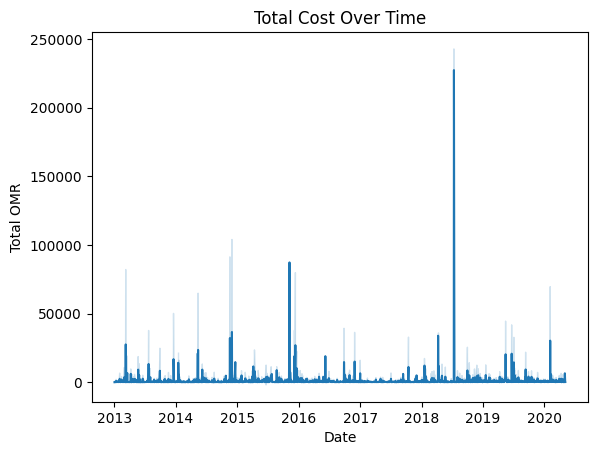

One or more columns: 'None', 'Supplier' not found in the dataset.


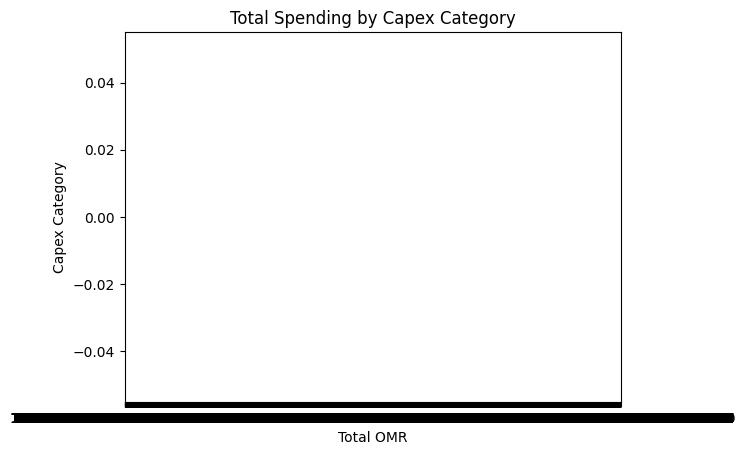

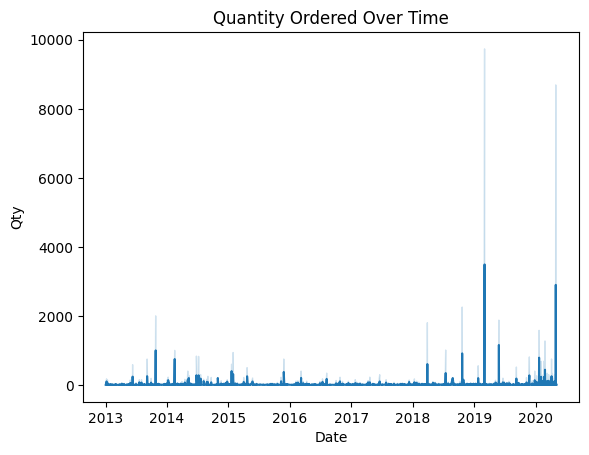

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with no automatic data type conversion
file_path = '/content/master database.xlsx'
df = pd.read_excel(file_path, dtype=object)

# Function to convert columns to appropriate types and plot
def safe_plot_and_convert(x_column, y_column, plot_type, title, df):
    # Attempt to convert columns to appropriate types
    for col in [x_column, y_column]:
        if col in df.columns:
            try:
                if col == x_column:
                    df[x_column] = pd.to_datetime(df[x_column], errors='coerce')  # Convert to datetime if it's the x-axis
                else:
                    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric for other columns
            except Exception as e:
                print(f"Error converting column '{col}': {e}")
                return

    # Check if columns exist and plot if they do
    if x_column in df.columns and y_column in df.columns:
        if plot_type == 'line':
            sns.lineplot(data=df, x=x_column, y=y_column)
        elif plot_type == 'bar':
            sns.barplot(x=x_column, y=y_column, data=df, estimator=sum)
        elif plot_type == 'count':
            sns.countplot(y=y_column, data=df, order=df[y_column].value_counts().index)
        plt.title(title)
        plt.show()
    else:
        print(f"One or more columns: '{x_column}', '{y_column}' not found in the dataset.")

# Plotting the data
safe_plot_and_convert('Date', 'Total OMR', 'line', 'Total Cost Over Time', df)
safe_plot_and_convert(None, 'Supplier', 'count', 'Frequency of Orders by Supplier', df)
safe_plot_and_convert('Total OMR', 'Capex Category', 'bar', 'Total Spending by Capex Category', df)
safe_plot_and_convert('Date', 'Qty', 'line', 'Quantity Ordered Over Time', df)


In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/master database.xlsx'
df = pd.read_excel(file_path)

# Ensure 'Date' and 'Total OMR' columns are in the correct format
df['Date'] = pd.to_datetime(df['Date'])
df['Total OMR'] = pd.to_numeric(df['Total OMR'], errors='coerce')

# Set 'Date' as the index for time series analysis
df.set_index('Date', inplace=True)

# Resampling data monthly and summing up 'Total OMR'
monthly_costs = df['Total OMR'].resample('M').sum()

# Specify the frequency explicitly
monthly_costs = monthly_costs.asfreq('M')

# Check for stationarity and differencing if needed
monthly_costs_diff = monthly_costs.diff().dropna()

# ARIMA model for forecasting
model = ARIMA(monthly_costs_diff, order=(5,1,0))
model_fit = model.fit()

# Forecast
forecast_diff = model_fit.forecast(steps=12)[0]

# Revert differencing to get actual forecast
last_cost = monthly_costs.iloc[-1]
forecast = [last_cost]
for diff in forecast_diff:
    forecast.append(forecast[-1] + diff)

# Plotting the forecast
plt.figure(figsize=(12,6))
plt.plot(monthly_costs, label='Historical Monthly Cost')
plt.plot(pd.date_range(monthly_costs.index[-1], periods=12, freq='M'), forecast[1:], label='Forecasted Cost')
plt.title('Monthly Cost Forecast')
plt.legend()
plt.show()

# Save the forecast to a file
forecast_df = pd.DataFrame({'Forecast Date': pd.date_range(monthly_costs.index[-1], periods=12, freq='M'), 'Forecasted Cost': forecast[1:]})
forecast_df.to_csv('/content/cost_forecast.csv', index=False)

# Additional Analyses (Supplier Analysis, Category Spending, Quantity Trends)
# ... (rest of the code remains the same)


ModuleNotFoundError: No module named 'pandas'

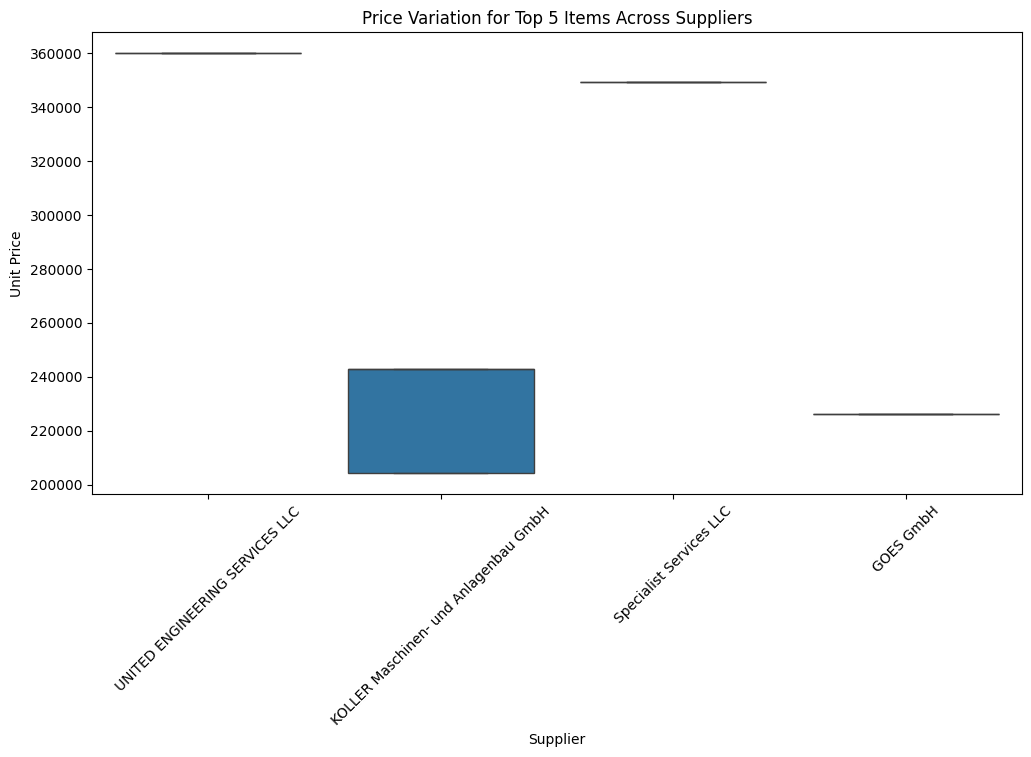

In [ ]:
# Example: Focusing on top 5 high-spend items
top_items = df.groupby('Line item description')['Total OMR'].sum().sort_values(ascending=False).head(5).index
focused_df = df[df['Line item description'].isin(top_items)]

# Analyzing price variation for these items across suppliers
plt.figure(figsize=(12,6))
sns.boxplot(x='Supplier', y='Unit Price', data=focused_df)
plt.xticks(rotation=45)
plt.title('Price Variation for Top 5 Items Across Suppliers')
plt.show()

# Further detailed analyses can be conducted similarly


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Assuming df is your DataFrame with relevant data
# Selecting features for clustering (e.g., prices, quantities)
features = df[['Unit Price', 'Qty']].dropna()

# Apply K-Means Clustering


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Assuming df is your DataFrame with relevant data
# Selecting features for clustering and dropping rows with missing values
features = df[['Unit Price', 'Qty']].dropna()

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5)  # Number of clusters can be adjusted
clusters = kmeans.fit_predict(features)

# Create a new DataFrame for the clustered data
clustered_df = df.dropna(subset=['Unit Price', 'Qty']).copy()
clustered_df['Cluster'] = clusters

# Analyzing the clusters
clustered_data = clustered_df.groupby('Cluster').mean()  # Adjust based on desired insights
print(clustered_data)


              Qty    Unit Price     Total OMR
Cluster                                      
0        7.367306    100.727861    391.805634
1        1.600000  18703.232800  29996.678200
2        1.444444   5687.438000   8253.576667
3        1.946237   1478.508892   2942.126634
4        1.875000  10129.649250  19184.937500


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-38-30863668ad97>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clustered_data = clustered_df.groupby('Cluster').mean()  # Adjust based on desired insights


In [ ]:
# Adjusted line with explicit numeric_only parameter
clustered_data = clustered_df.groupby('Cluster').mean(numeric_only=True)


In [ ]:
for cluster in clustered_df['Cluster'].unique():
    print(f"Analysis for Cluster {cluster}:")
    cluster_subset = clustered_df[clustered_df['Cluster'] == cluster]
    # Perform analysis on cluster_subset


Analysis for Cluster 0:
Analysis for Cluster 3:
Analysis for Cluster 4:
Analysis for Cluster 2:
Analysis for Cluster 1:


In [ ]:
# Example analysis for one cluster (say Cluster 0)
cluster_0 = clustered_df[clustered_df['Cluster'] == 0]

# Basic statistics
print("Basic Statistics for Cluster 0:")
print(cluster_0[['Unit Price', 'Qty']].describe())

# Most common items and suppliers in this cluster
print("\nMost Common Items in Cluster 0:")
print(cluster_0['Line item description'].value_counts().head())

print("\nMost Common Suppliers in Cluster 0:")
print(cluster_0['Supplier'].value_counts().head())


Basic Statistics for Cluster 0:
       Unit Price         Qty
count  991.000000  991.000000
mean   100.727861    7.367306
std    164.885538   14.719886
min      0.085000    1.000000
25%      6.522500    2.000000
50%     16.862000    4.000000
75%    117.704000   10.000000
max    769.829000  300.000000

Most Common Items in Cluster 0:
Carbon Dioxide 0.1-5.2%                                                                     10
FUEL FILTER                                                                                 10
OIL FILTER                                                                                   9
Hydrogen Sulphide 1-60ppm                                                                    8
`O'-RING (STEM ADAPTER) NO-221 MATL - NITRILE for 3-1/16" 10K Gate Valve - Part # 50221N     8
Name: Line item description, dtype: int64

Most Common Suppliers in Cluster 0:
NATIONAL OILWELL VARCO L.P. (MISSION)    179
FILTERS INTERNATIONAL LLC                146
SPADES INTERNATIONAL 

In [ ]:
# Assuming cluster_0 is your DataFrame filtered for Cluster 0
for item in cluster_0['Line item description'].unique():
    item_data = cluster_0[cluster_0['Line item description'] == item]
    print(f"Analysis for {item}:")
    print(item_data[['Unit Price', 'Qty']].describe())
    # Add more analyses as needed


Streaming output truncated to the last 5000 lines.
Analysis for SAKURA AIR FILTER A8686:
       Unit Price  Qty
count         1.0  1.0
mean         25.0  4.0
std           NaN  NaN
min          25.0  4.0
25%          25.0  4.0
50%          25.0  4.0
75%          25.0  4.0
max          25.0  4.0
Analysis for  FUEL FILTER:
       Unit Price   Qty
count         1.0   1.0
mean          2.2  12.0
std           NaN   NaN
min           2.2  12.0
25%           2.2  12.0
50%           2.2  12.0
75%           2.2  12.0
max           2.2  12.0
Analysis for SAKURA OIL FILTER:
       Unit Price  Qty
count         1.0  1.0
mean          4.5  8.0
std           NaN  NaN
min           4.5  8.0
25%           4.5  8.0
50%           4.5  8.0
75%           4.5  8.0
max           4.5  8.0
Analysis for BALDWIN FUEL FILTER FC5504:
       Unit Price  Qty
count         1.0  1.0
mean          3.2  8.0
std           NaN  NaN
min           3.2  8.0
25%           3.2  8.0
50%           3.2  8.0
75%           3.2  8

In [ ]:
summary_table = cluster_0.groupby('Line item description').agg({'Unit Price': ['mean', 'std'], 'Qty': ['sum'], 'Total OMR': ['sum']})
print(summary_table)


                                                   Unit Price             Qty  \
                                                         mean       std   sum   
Line item description                                                           
29510910                                              23.0000       NaN   5.0   
 FUEL FILTER                                           2.2000       NaN  12.0   
 J PACKING + BACK UP RING for ADJ. CHOKE, TYPE ...    49.0000       NaN   1.0   
 Magnetic Pick-up                                     32.0000       NaN   2.0   
0-15000 PSI Gauge                                    393.0870       NaN   1.0   
...                                                       ...       ...   ...   
valve strip for 6" soft seat Daniel meter            567.2070       NaN   2.0   
¼” NPT Thread Tap Set                                 20.0000       NaN   1.0   
¼” hex plug                                            0.9625  0.000707   8.0   
¾” Impact wrench - Model 259

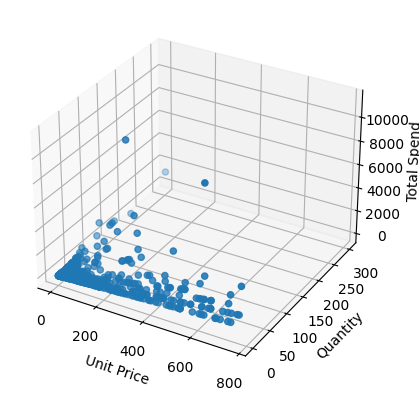

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_0['Unit Price'], cluster_0['Qty'], cluster_0['Total OMR'])
ax.set_xlabel('Unit Price')
ax.set_ylabel('Quantity')
ax.set_zlabel('Total Spend')
plt.show()


<ipython-input-47-f49a923113ba>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_0.groupby(cluster_0.index).mean()['Unit Price'].plot()


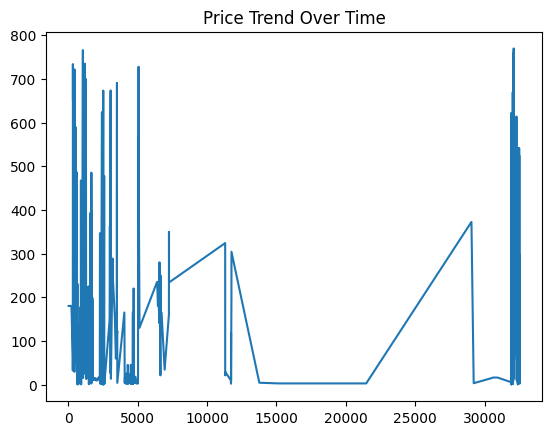

In [ ]:
cluster_0.groupby(cluster_0.index).mean()['Unit Price'].plot()
plt.title('Price Trend Over Time')
plt.show()


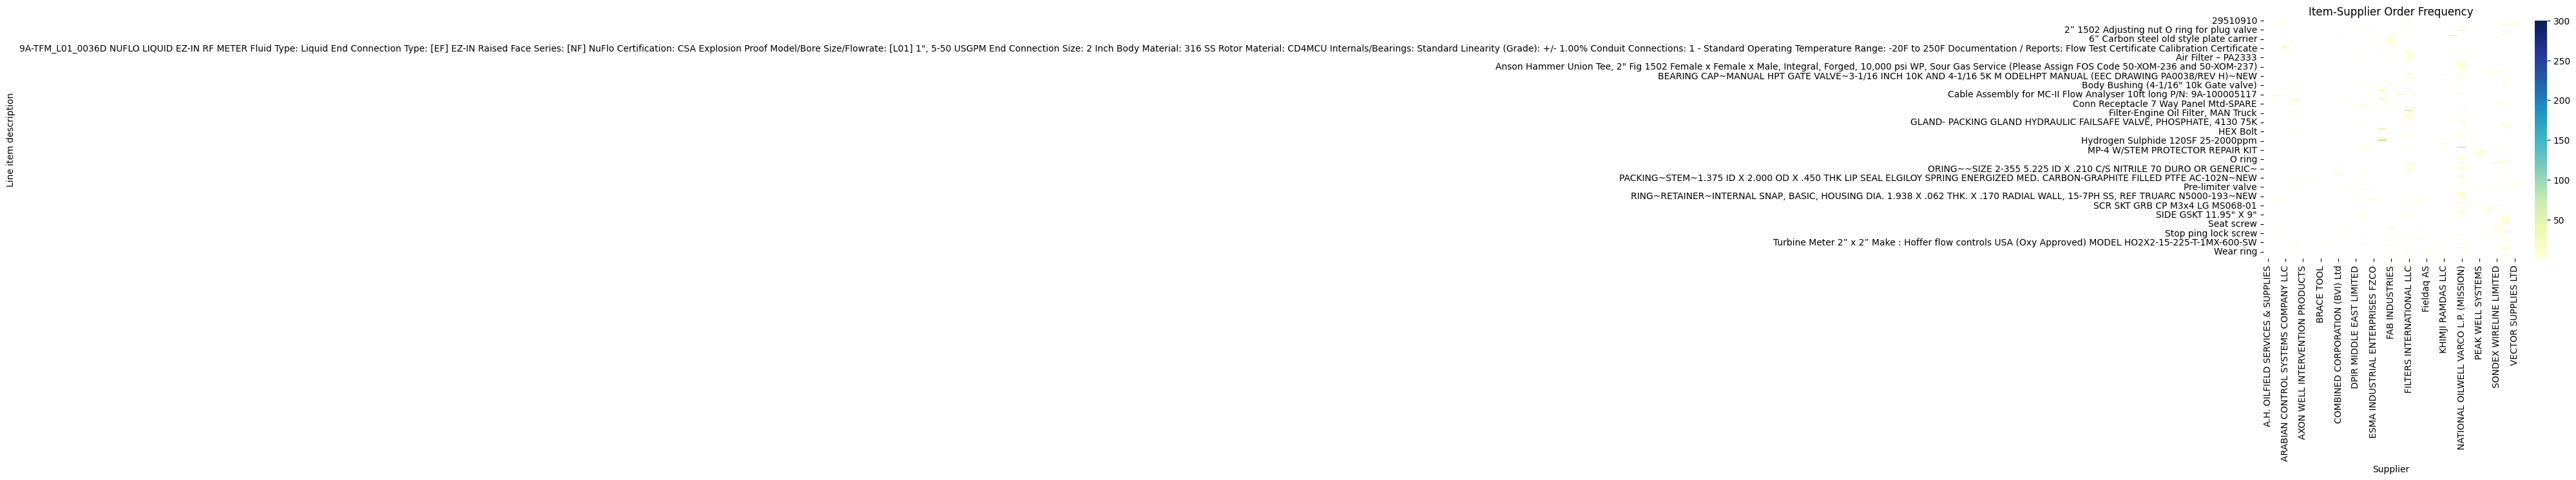

In [ ]:
import seaborn as sns
pivot_table = cluster_0.pivot_table(index='Line item description', columns='Supplier', values='Qty', aggfunc='sum')
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Item-Supplier Order Frequency')
plt.show()


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_excel('/content/master database.xlsx')

# Data preprocessing steps (e.g., handling missing values, converting data types)
# ...


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_excel('/content/master database.xlsx')

# Aggregating data
item_supplier_spend = df.groupby(['Line item description', 'Supplier']).agg({'Unit Price': 'mean', 'Total OMR': 'sum'}).reset_index()

# Visualization 1: Average Unit Price per Item by Supplier
pivot_avg_price = item_supplier_spend.pivot('Line item description', 'Supplier', 'Unit Price')
plt.figure(figsize=(10, 10))
sns.heatmap(pivot_avg_price, annot=False, cmap='YlGnBu')
plt.title('Average Unit Price per Item by Supplier')
plt.show()

# Visualization 2: Total Spend per Item by Supplier
pivot_total_spend = item_supplier_spend.pivot('Line item description', 'Supplier', 'Total OMR')
plt.figure(figsize=(10, 10))
sns.heatmap(pivot_total_spend, annot=False, cmap='YlGnBu')
plt.title('Total Spend per Item by Supplier')
plt.show()


TypeError: unsupported operand type(s) for +: 'datetime.datetime' and 'datetime.datetime'

<ipython-input-61-a9b5216d282d>:24: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_avg_price = item_supplier_spend.pivot('Line item description', 'Supplier', 'Unit Price')


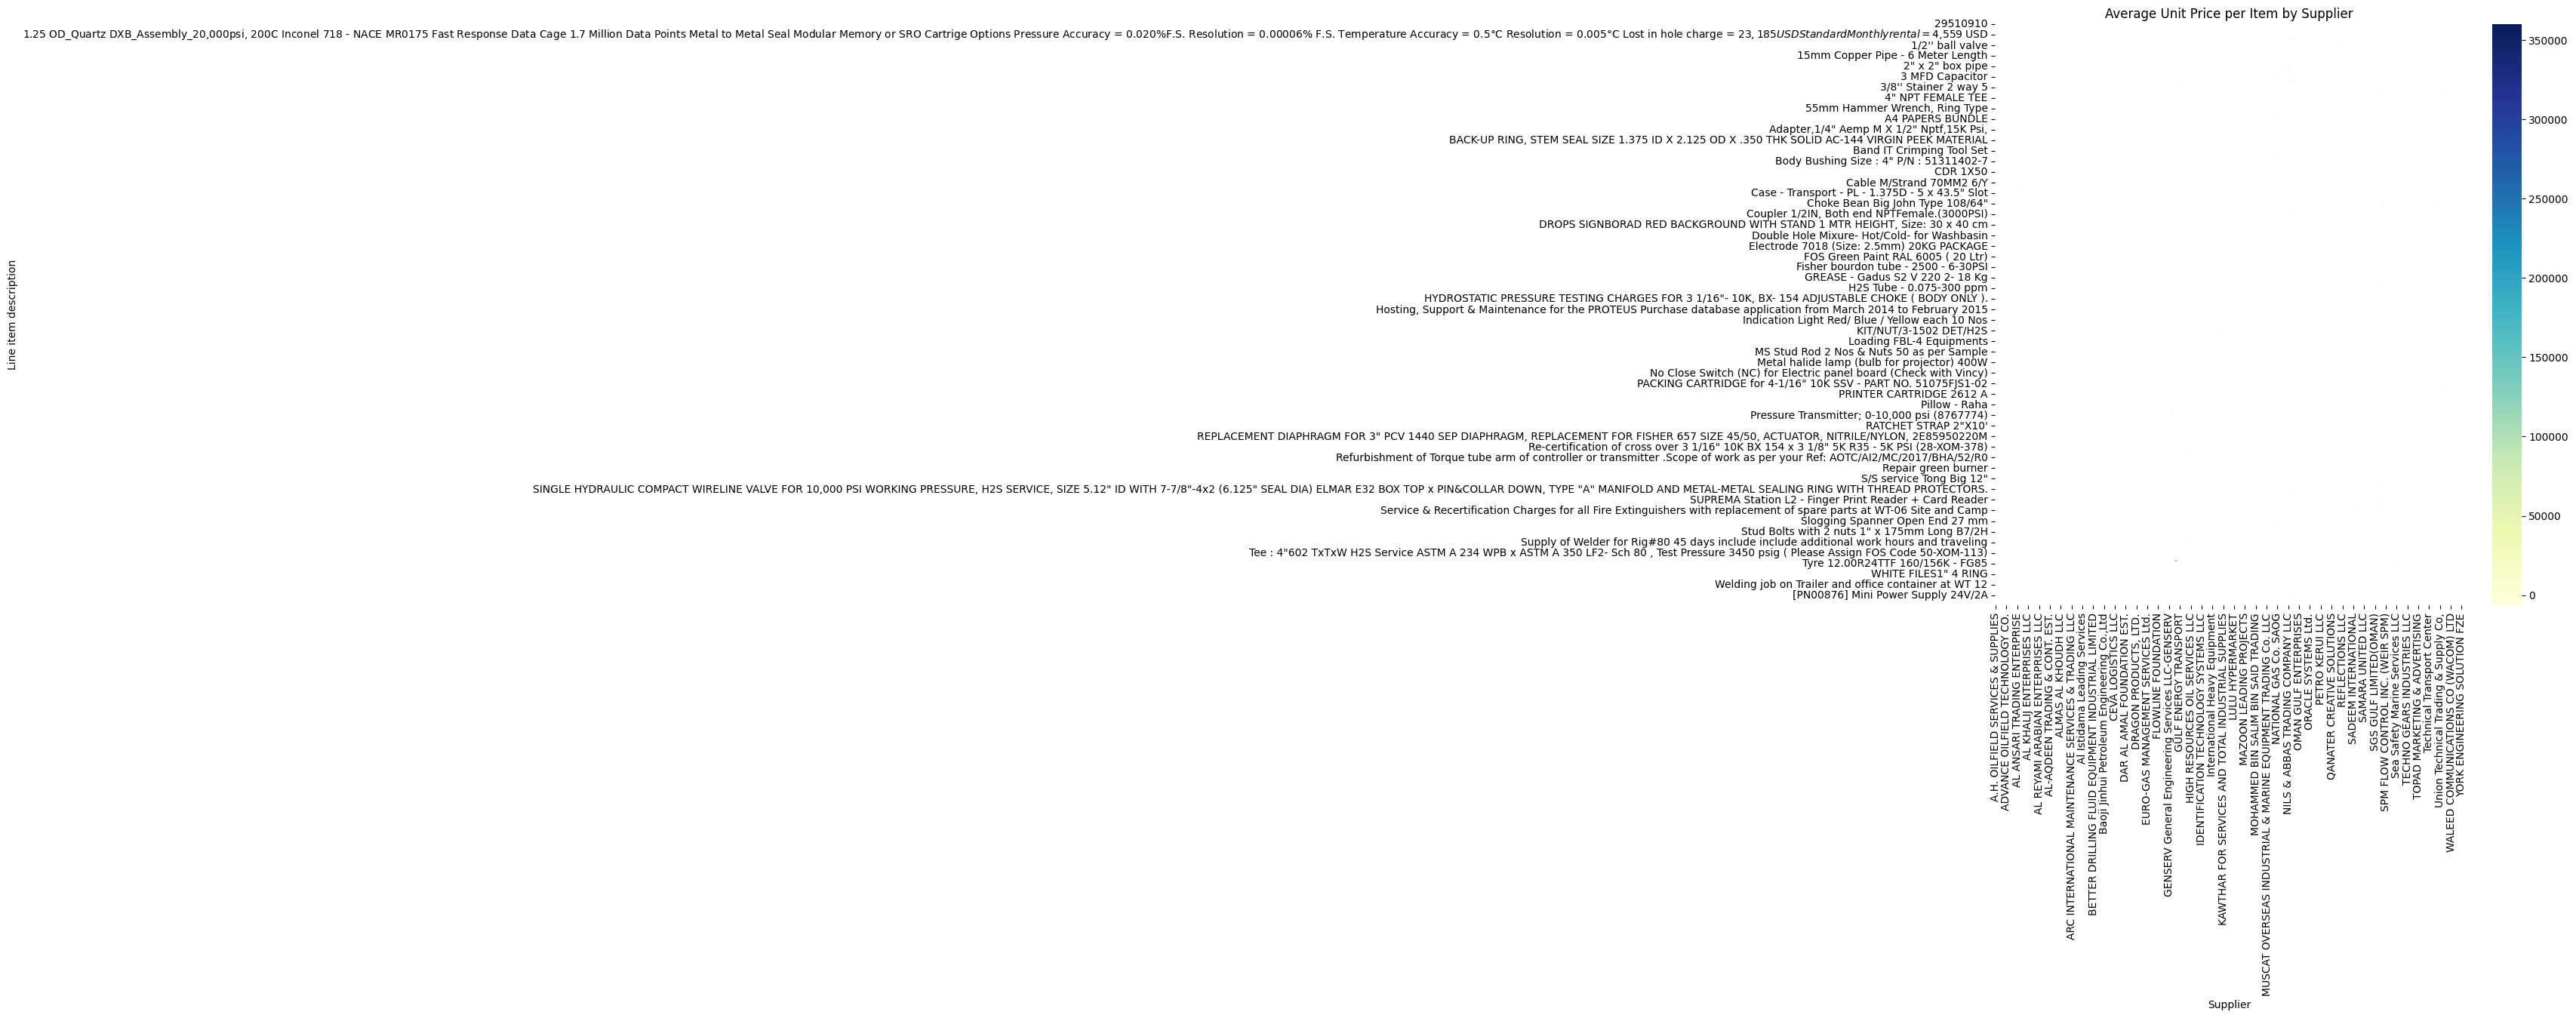

<ipython-input-61-a9b5216d282d>:31: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_total_spend = item_supplier_spend.pivot('Line item description', 'Supplier', 'Total OMR')


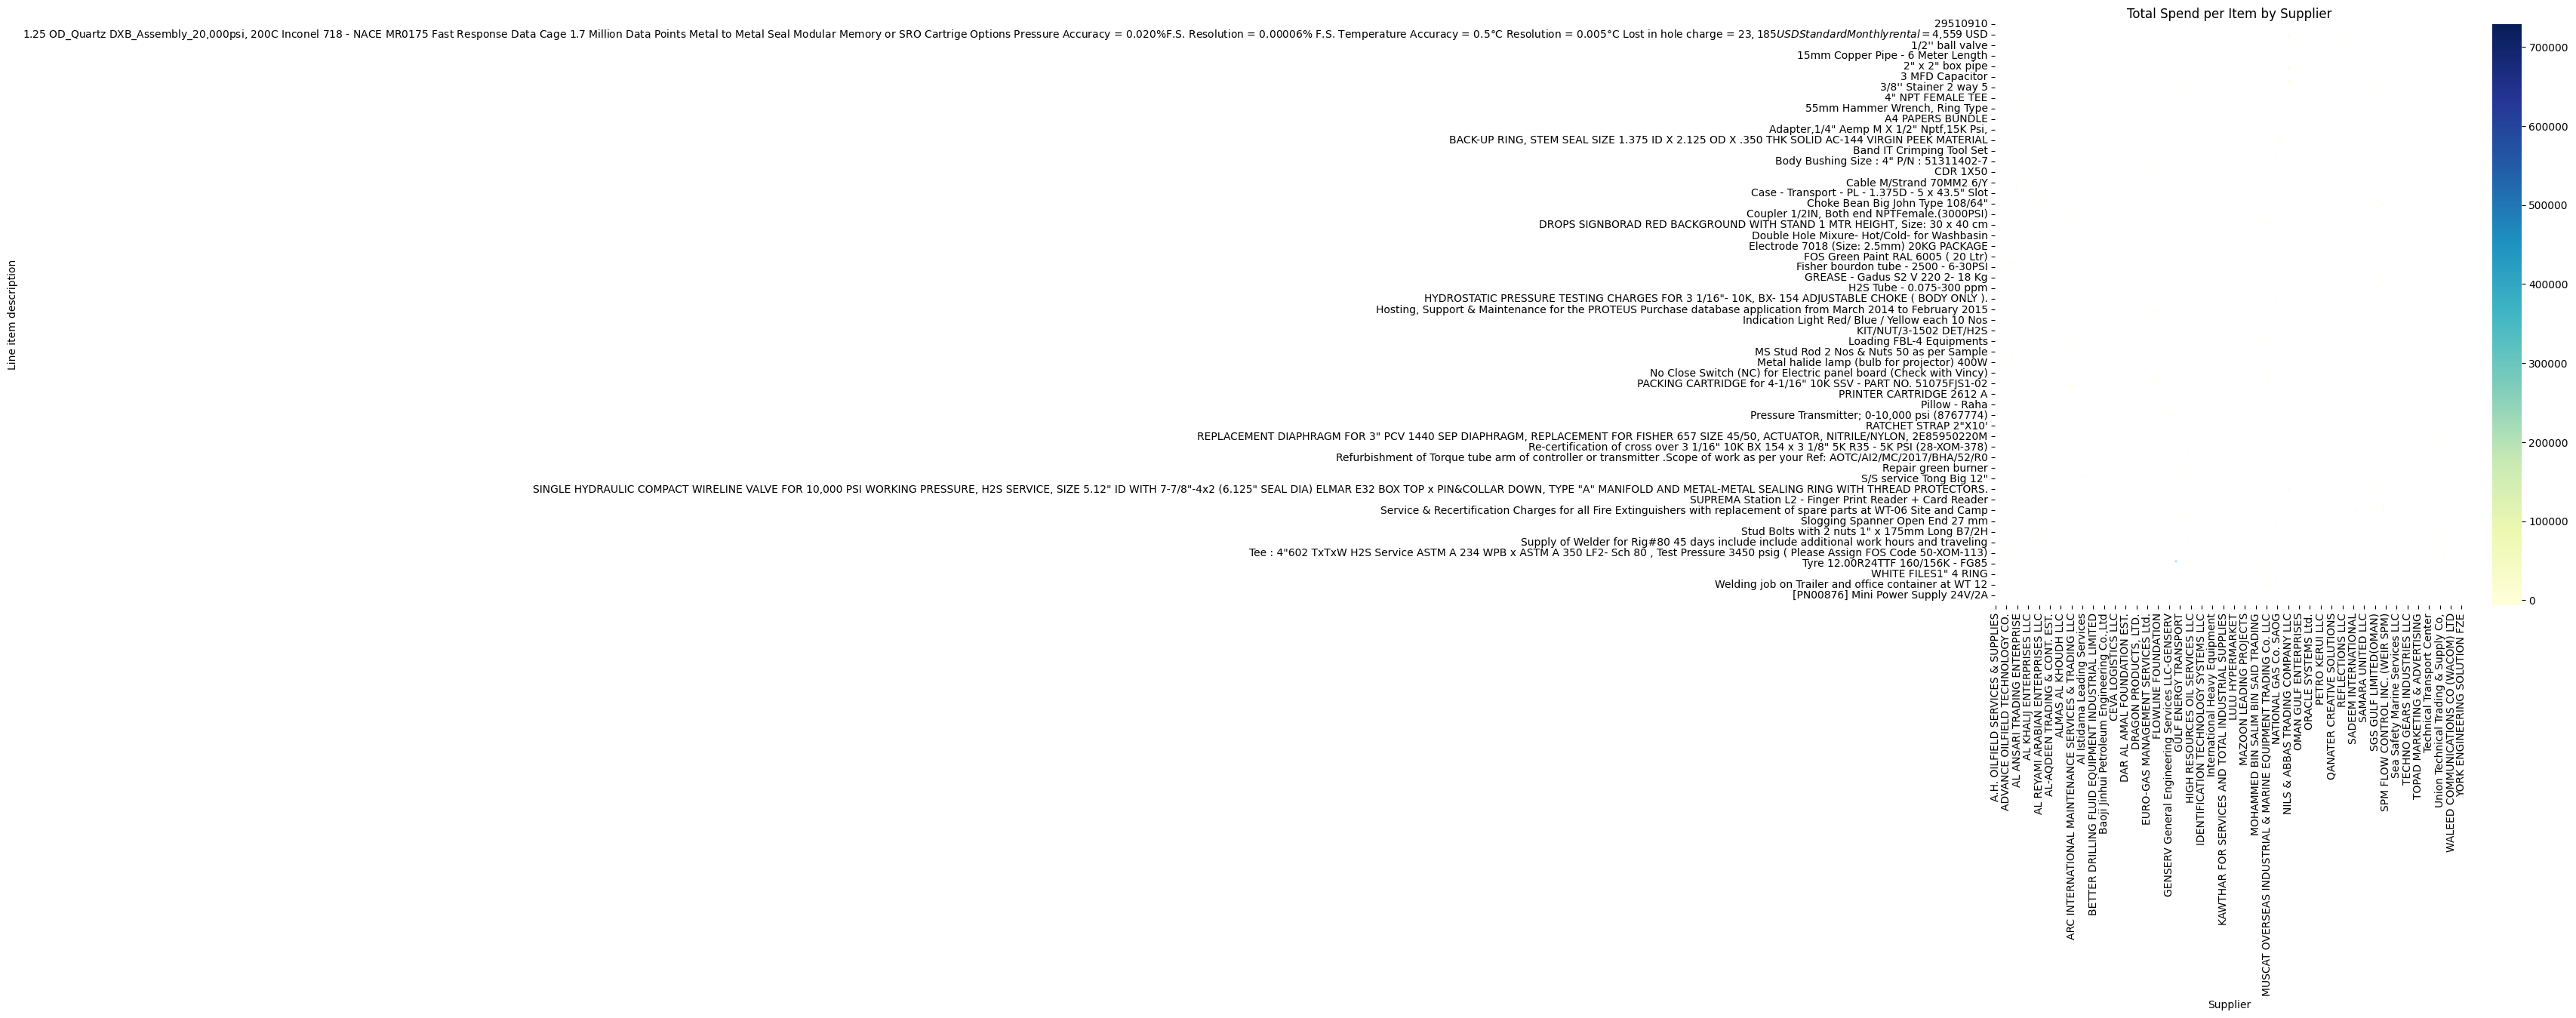

<ipython-input-61-a9b5216d282d>:48: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_avg_price = item_supplier_spend.pivot('Line item description', 'Supplier', 'Unit Price')


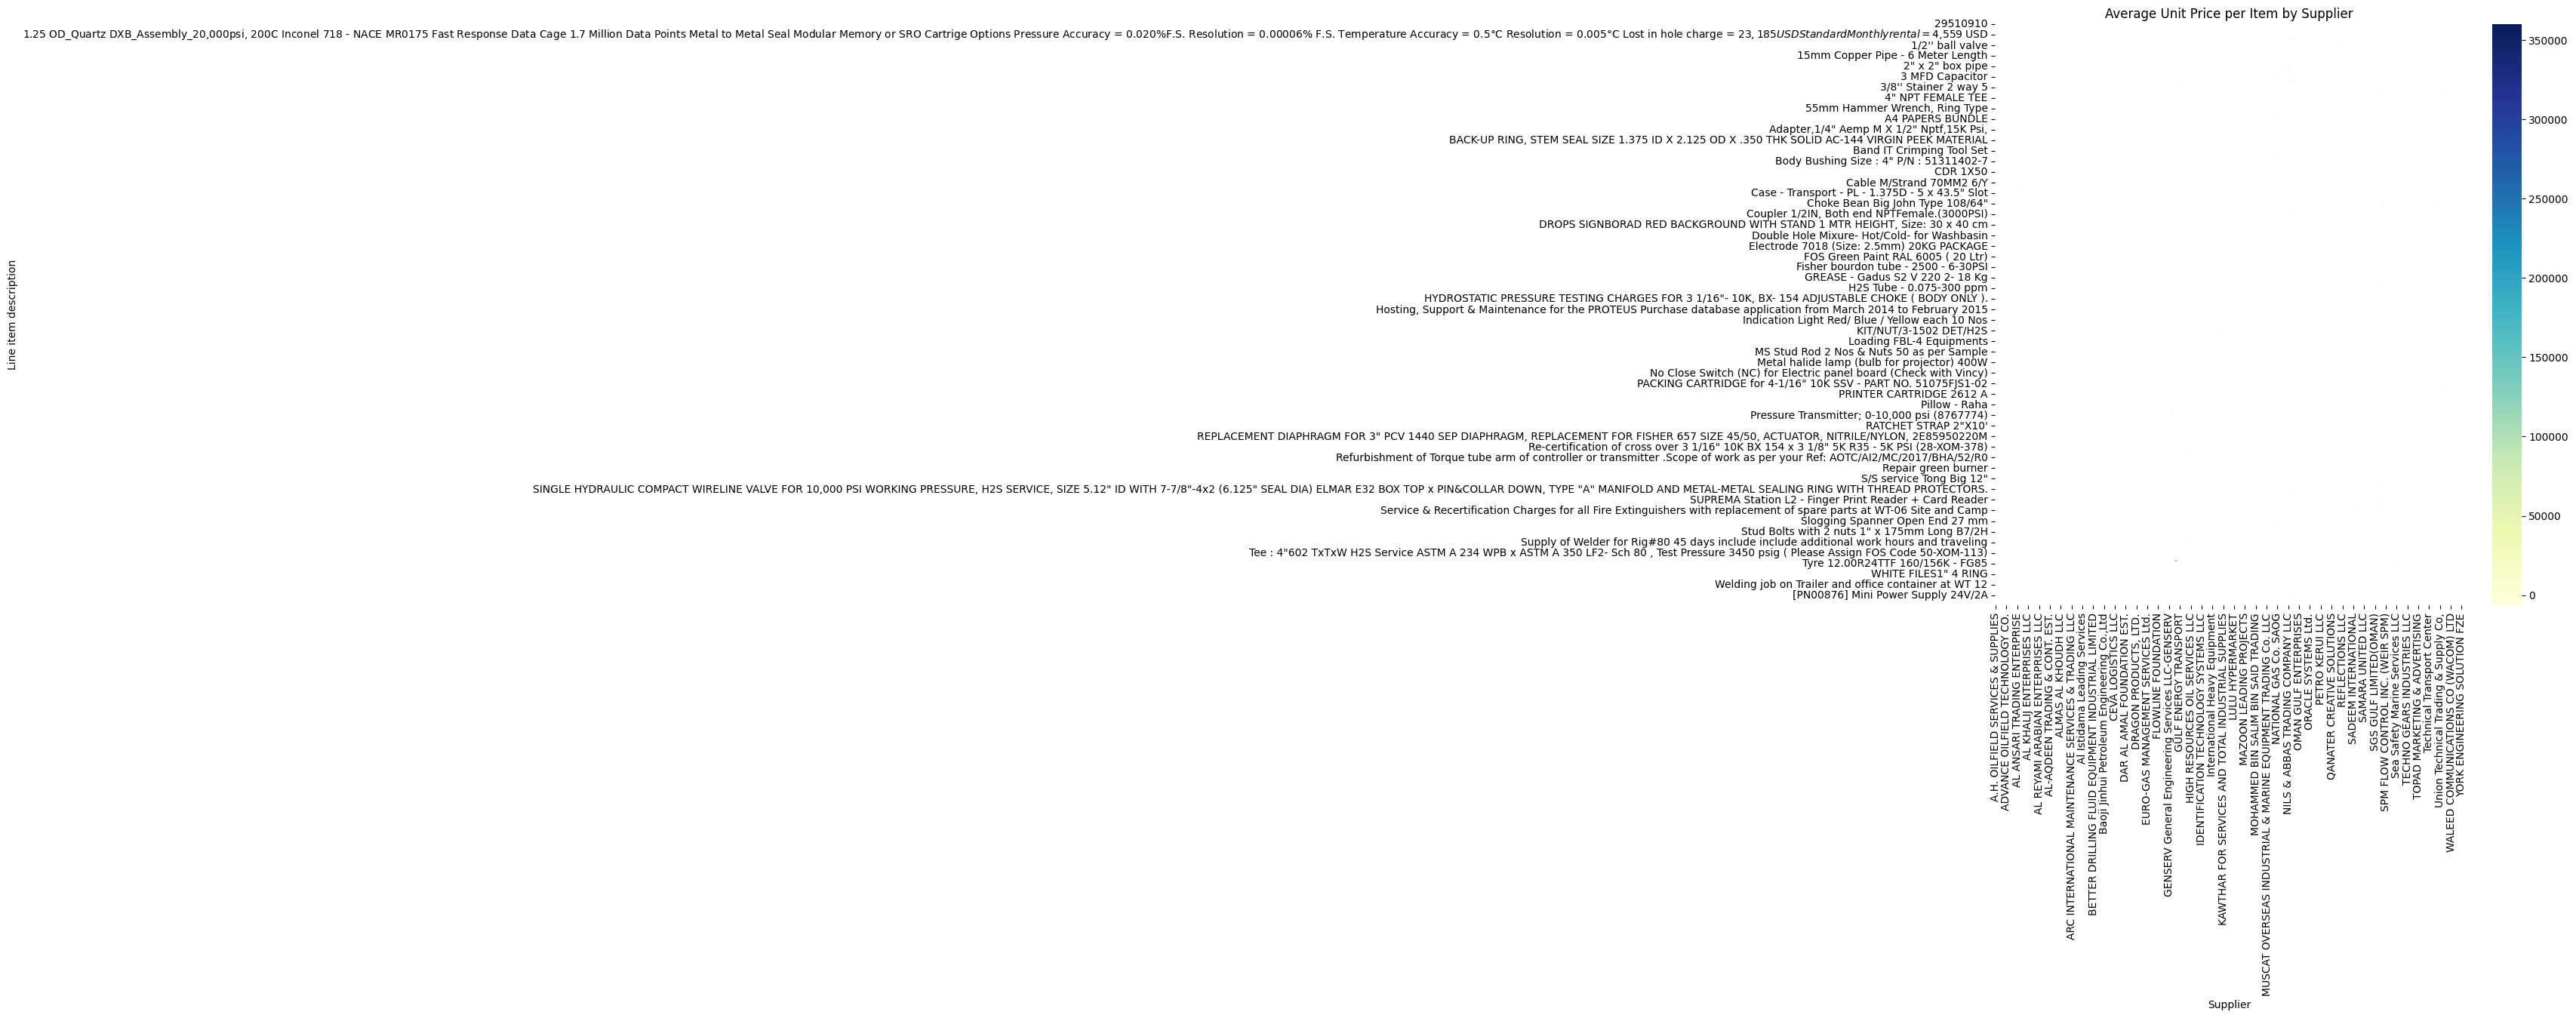

<ipython-input-61-a9b5216d282d>:55: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_total_spend = item_supplier_spend.pivot('Line item description', 'Supplier', 'Total OMR')


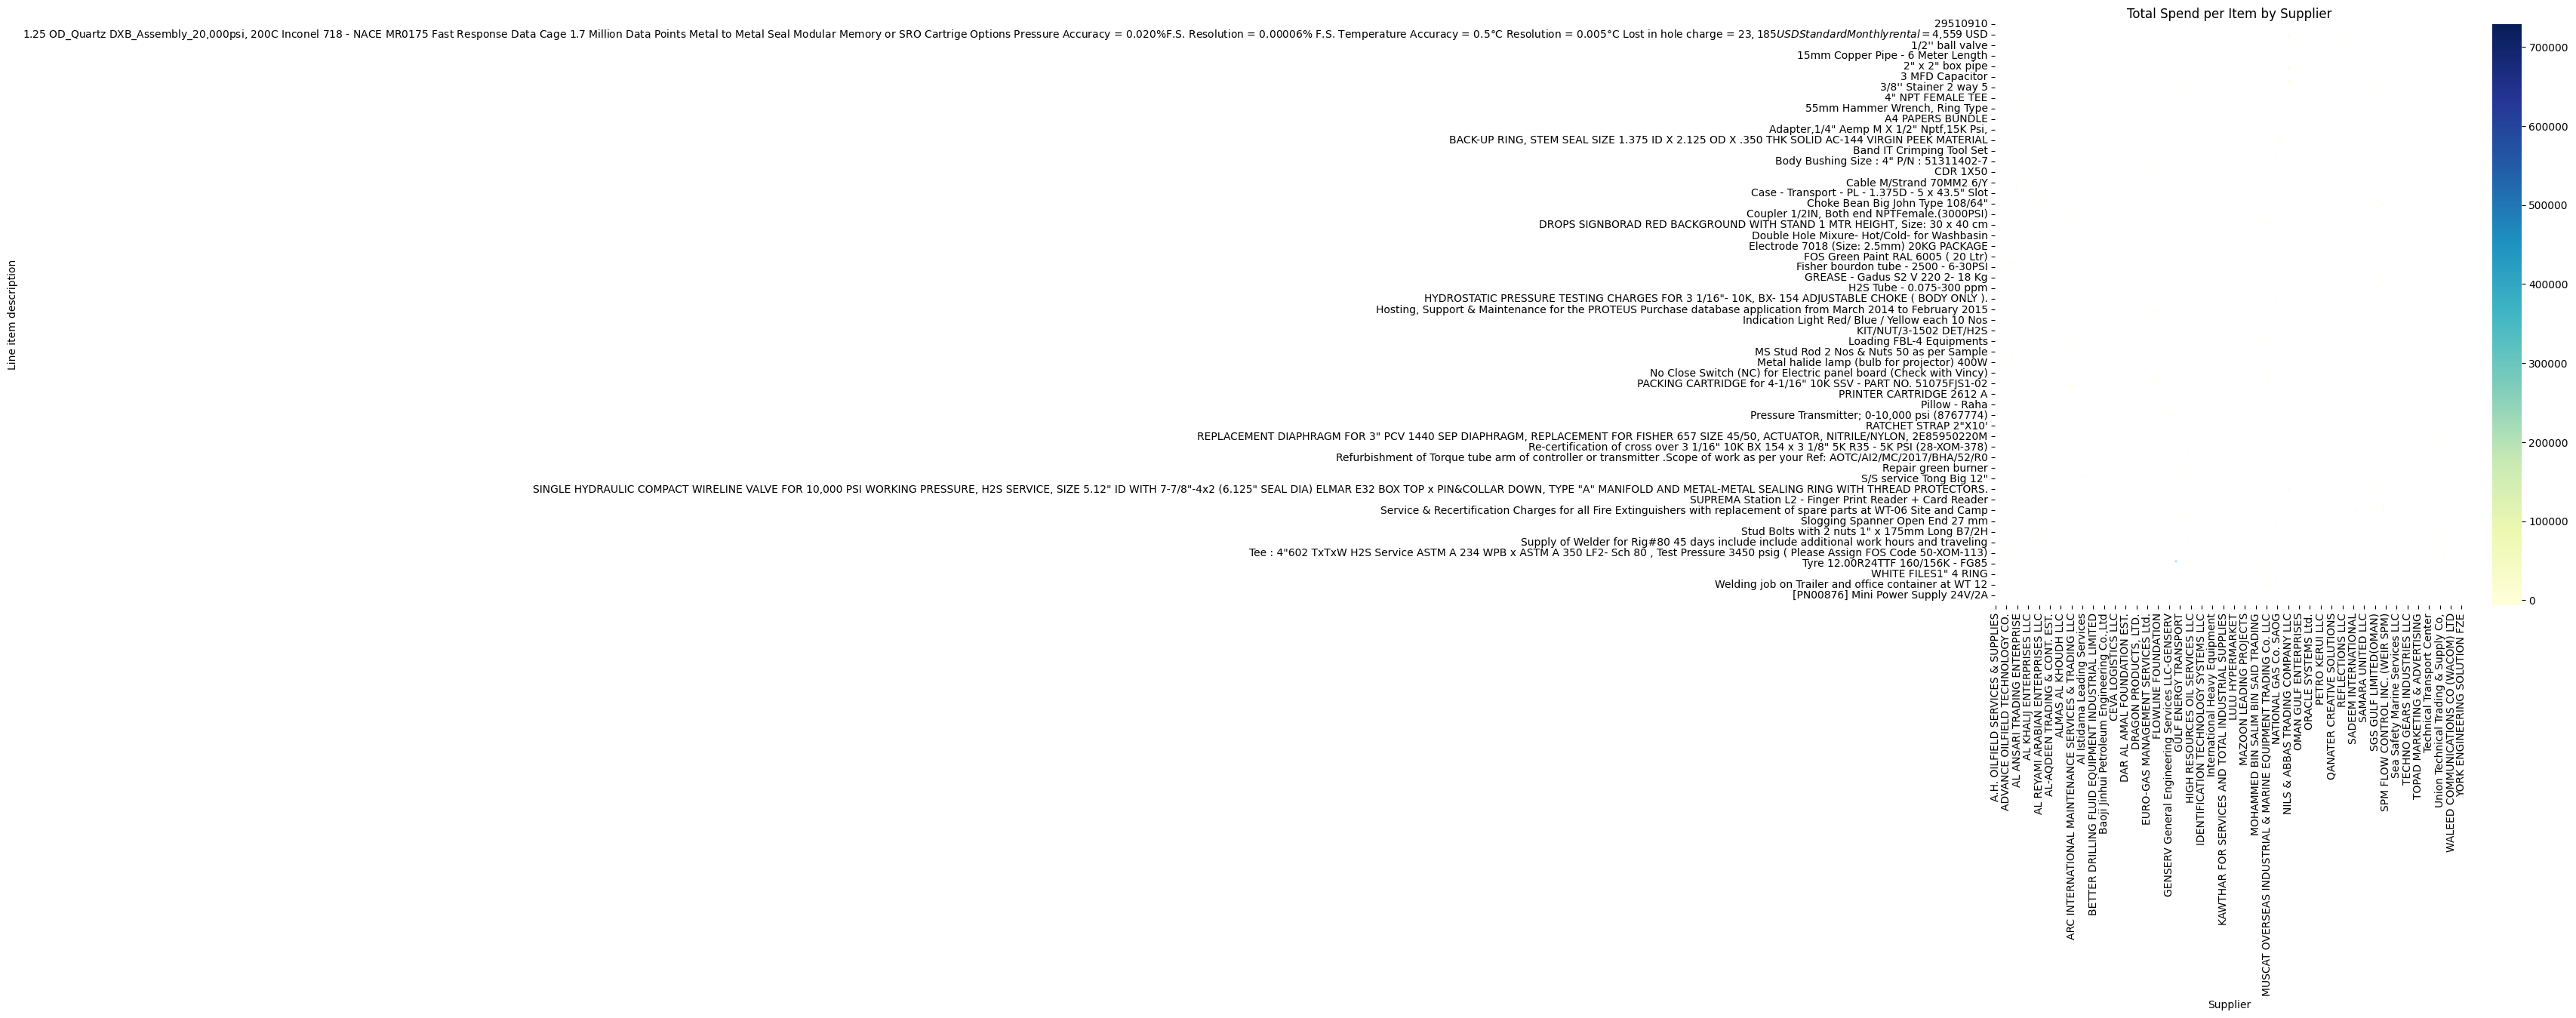

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_excel('/content/master database.xlsx')

# Load your dataset
df = pd.read_excel('/content/master database.xlsx')

# Ensure 'Total OMR' is a numeric column
df['Total OMR'] = pd.to_numeric(df['Total OMR'], errors='coerce')  # Convert to numeric, set errors to 'coerce' to handle non-numeric data

# Drop rows where 'Total OMR' or 'Unit Price' is NaN after conversion
df.dropna(subset=['Total OMR', 'Unit Price'], inplace=True)

# Aggregating data
item_supplier_spend = df.groupby(['Line item description', 'Supplier']).agg({'Unit Price': 'mean', 'Total OMR': 'sum'}).reset_index()

# Visualization 1: Average Unit Price per Item by Supplier
pivot_avg_price = item_supplier_spend.pivot('Line item description', 'Supplier', 'Unit Price')
plt.figure(figsize=(10, 10))
sns.heatmap(pivot_avg_price, annot=False, cmap='YlGnBu')
plt.title('Average Unit Price per Item by Supplier')
plt.show()

# Visualization 2: Total Spend per Item by Supplier
pivot_total_spend = item_supplier_spend.pivot('Line item description', 'Supplier', 'Total OMR')
plt.figure(figsize=(10, 10))
sns.heatmap(pivot_total_spend, annot=False, cmap='YlGnBu')
plt.title('Total Spend per Item by Supplier')
plt.show()


# Ensure 'Total OMR' is a numeric column
df['Total OMR'] = pd.to_numeric(df['Total OMR'], errors='coerce')  # Convert to numeric, set errors to 'coerce' to handle non-numeric data

# Drop rows where 'Total OMR' or 'Unit Price' is NaN after conversion
df.dropna(subset=['Total OMR', 'Unit Price'], inplace=True)

# Aggregating data
item_supplier_spend = df.groupby(['Line item description', 'Supplier']).agg({'Unit Price': 'mean', 'Total OMR': 'sum'}).reset_index()

# Visualization 1: Average Unit Price per Item by Supplier
pivot_avg_price = item_supplier_spend.pivot('Line item description', 'Supplier', 'Unit Price')
plt.figure(figsize=(10, 10))
sns.heatmap(pivot_avg_price, annot=False, cmap='YlGnBu')
plt.title('Average Unit Price per Item by Supplier')
plt.show()

# Visualization 2: Total Spend per Item by Supplier
pivot_total_spend = item_supplier_spend.pivot('Line item description', 'Supplier', 'Total OMR')
plt.figure(figsize=(10, 10))
sns.heatmap(pivot_total_spend, annot=False, cmap='YlGnBu')
plt.title('Total Spend per Item by Supplier')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data from the "dataset" sheet of the Excel file
df = pd.read_excel('/content/master database.xlsx', sheet_name='dataset')

# Assuming you have a target variable named 'Target' and feature columns.
# Replace 'Target' and 'features' with your actual column names.
features = df[['Feature1', 'Feature2', 'Feature3']]  # Replace with your features
target = df['Target']  # Replace with your target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train a Decision Tree Classifier (you can choose other algorithms)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


ValueError: Worksheet named 'dataset' not found

In [ ]:
import pandas as pd

# Define the Excel file path
excel_file = '/content/master database.xlsx'

# Get the list of sheet names in the Excel file
all_sheet_names = pd.ExcelFile(excel_file).sheet_names

# Filter out sheets with the word "master" in their names
sheets_to_ignore = [sheet_name for sheet_name in all_sheet_names if 'master' in sheet_name.lower()]

# Read data from sheets that don't match the filter condition
dataframes = {}
for sheet_name in all_sheet_names:
    if sheet_name not in sheets_to_ignore:
        dataframes[sheet_name] = pd.read_excel(excel_file, sheet_name=sheet_name)

# Now you have a dictionary 'dataframes' where keys are sheet names (except "master" sheets)
# and values are DataFrames containing data from those sheets.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the Excel file path
excel_file = '/content/master database.xlsx'

# Get the list of sheet names in the Excel file
all_sheet_names = pd.ExcelFile(excel_file).sheet_names

# Create a dictionary to store dataframes
dataframes = {}

# Loop through sheets
for sheet_name in all_sheet_names:
    if 'master' not in sheet_name.lower():  # Exclude sheets with 'master' in the name
        # Read data from the sheet
        df = pd.read_excel(excel_file, sheet_name=sheet_name)

        # Data Preprocessing (e.g., handling missing values)
        df.fillna(df.mean(), inplace=True)

        # Data Analysis (e.g., summary statistics)
        summary_stats = df.describe()
        print(f"Summary statistics for {sheet_name}:")
        print(summary_stats)

        # Visualization (e.g., histogram)
        plt.hist(df['Feature1'])
        plt.title(f'Histogram of Feature1 in {sheet_name}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

        # Modeling and Predictions (e.g., Random Forest Classifier)
        X = df.drop(columns=['Target'])
        y = df['Target']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        clf = RandomForestClassifier(random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy for {sheet_name}: {accuracy}")

        # Store the dataframe in the dictionary
        dataframes[sheet_name] = df

# Now you have dataframes and analysis for each sheet (excluding 'master' sheets)


Summary statistics for Complete List (2)-7 years:
                Qty     Unit Price
count  32511.000000   32511.000000
mean      23.296188     548.504518
std      529.021626    7167.362894
min        0.000000   -6449.115000
25%        1.000000       4.626000
50%        2.000000      23.500000
75%        6.000000     137.000000
max    60728.000000  359910.000000


<ipython-input-67-532075df41ae>:23: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)
<ipython-input-67-532075df41ae>:23: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


KeyError: 'Feature1'

In [ ]:
if 'Column_Name' in df.columns:
    plt.hist(df['Column_Name'])

In [ ]:
if 'Column_Name' in df.columns:
    plt.hist(df['Column_Name'])

In [ ]:
if 'Column_Name' in df.columns:
    plt.hist(df['Column_Name'])
    plt.title(f'Histogram of Column_Name in {sheet_name}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the Excel file path
excel_file = '/content/master database.xlsx'

# Get the list of sheet names in the Excel file
all_sheet_names = pd.ExcelFile(excel_file).sheet_names

# Create a dictionary to store dataframes
dataframes = {}

# Loop through sheets
for sheet_name in all_sheet_names:
    if 'master' not in sheet_name.lower():  # Exclude sheets with 'master' in the name
        # Read data from the sheet
        df = pd.read_excel(excel_file, sheet_name=sheet_name)

        # Data Preprocessing (e.g., handling missing values)
        df.fillna(df.mean(), inplace=True)

        # Data Analysis (e.g., summary statistics)
        summary_stats = df.describe()
        print(f"Summary statistics for {sheet_name}:")
        print(summary_stats)

        # Visualization (e.g., histogram)
        plt.hist(df['Column_Name'])
        plt.title(f'Histogram of Column_Name in {sheet_name}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

        # Modeling and Predictions (e.g., Random Forest Classifier)
        X = df.drop(columns=['Target'])
        y = df['Target']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        clf = RandomForestClassifier(random_state=42)
        clf.fit(X_train, y_train)

Summary statistics for Complete List (2)-7 years:
                Qty     Unit Price
count  32511.000000   32511.000000
mean      23.296188     548.504518
std      529.021626    7167.362894
min        0.000000   -6449.115000
25%        1.000000       4.626000
50%        2.000000      23.500000
75%        6.000000     137.000000
max    60728.000000  359910.000000


<ipython-input-79-199a948bcf67>:23: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)
<ipython-input-79-199a948bcf67>:23: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


KeyError: 'Column_Name'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the Excel file path
excel_file = '/content/master database.xlsx'

# Get the list of sheet names in the Excel file
all_sheet_names = pd.ExcelFile(excel_file).sheet_names

# Create a dictionary to store dataframes
dataframes = {}

# Loop through sheets
for sheet_name in all_sheet_names:
    if 'master' not in sheet_name.lower():  # Exclude sheets with 'master' in the name
        # Read data from the sheet
        df = pd.read_excel(excel_file, sheet_name=sheet_name)

        # Data Preprocessing (e.g., handling missing values)
        df.fillna(df.mean(), inplace=True)

        # Data Analysis (e.g., summary statistics)
        summary_stats = df.describe()
        print(f"Summary statistics for {sheet_name}:")
        print(summary_stats)

        # Visualization (e.g., histogram)
        # plt.hist(df['Column_Name'])
        # plt.title(f'Histogram of Column_Name in {sheet_name}')
        # plt.xlabel('Value')
        # plt.ylabel('Frequency')
        # plt.show()

        # Modeling and Predictions (e.g., Random Forest Classifier)
        X = df.drop(columns=['Target'])
        y = df['Target']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        clf = RandomForestClassifier(random_state=42)
        clf.fit(X_train, y_train)

<ipython-input-80-7339f6f0e150>:23: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)
<ipython-input-80-7339f6f0e150>:23: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


Summary statistics for Complete List (2)-7 years:
                Qty     Unit Price
count  32511.000000   32511.000000
mean      23.296188     548.504518
std      529.021626    7167.362894
min        0.000000   -6449.115000
25%        1.000000       4.626000
50%        2.000000      23.500000
75%        6.000000     137.000000
max    60728.000000  359910.000000


KeyError: "['Target'] not found in axis"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the Excel file path
excel_file = '/content/master database.xlsx'

# Get the list of sheet names in the Excel file
all_sheet_names = pd.ExcelFile(excel_file).sheet_names

# Create a dictionary to store dataframes
dataframes = {}

# Loop through sheets
for sheet_name in all_sheet_names:
    if 'master' not in sheet_name.lower():  # Exclude sheets with 'master' in the name
        # Read data from the sheet
        df = pd.read_excel(excel_file, sheet_name=sheet_name)

        # Data Preprocessing (e.g., handling missing values)
        df.fillna(df.mean(), inplace=True)

        # Data Analysis (e.g., summary statistics)
        summary_stats = df.describe()
        print(f"Summary statistics for {sheet_name}:")
        print(summary_stats)

        # Visualization (e.g., histogram)
        # plt.hist(df['Column_Name'])
        # plt.title(f'Histogram of Column_Name in {sheet_name}')
        # plt.xlabel('Value')
        # plt.ylabel('Frequency')
        # plt.show()

        # Modeling and Predictions (e.g., Random Forest Classifier)
        if 'Target' in df.columns:

            X = df.drop(columns=['Target'])
            y = df['Target']
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.25, random_state=42)

<ipython-input-82-cb19590402e7>:23: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)
<ipython-input-82-cb19590402e7>:23: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


Summary statistics for Complete List (2)-7 years:
                Qty     Unit Price
count  32511.000000   32511.000000
mean      23.296188     548.504518
std      529.021626    7167.362894
min        0.000000   -6449.115000
25%        1.000000       4.626000
50%        2.000000      23.500000
75%        6.000000     137.000000
max    60728.000000  359910.000000


<ipython-input-82-cb19590402e7>:23: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


Summary statistics for Sheet3:
       Unnamed: 0   Unnamed: 1 Unnamed: 2  Unnamed: 3
count          16          109         55         114
unique         16          109         16          18
top      Category  Description    (blank)           1
freq            1            1         40          31


<ipython-input-82-cb19590402e7>:23: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


Summary statistics for Sheet1:
        Line Item        Qty  Size  Pressure
count   54.000000  54.000000   0.0       0.0
mean   132.549020   6.264151   NaN       NaN
std     72.237636  10.446902   NaN       NaN
min     10.000000   1.000000   NaN       NaN
25%     72.500000   1.250000   NaN       NaN
50%    132.549020   3.000000   NaN       NaN
75%    190.000000   6.198113   NaN       NaN
max    260.000000  72.000000   NaN       NaN


<ipython-input-82-cb19590402e7>:23: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)
<ipython-input-82-cb19590402e7>:23: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


Summary statistics for Sheet2:
       Unnamed: 0         Qty    Unit Price     Total OMR
count         0.0  314.000000    314.000000    314.000000
mean          NaN    2.015924   1480.554554   2712.472841
std           NaN    3.565418   5545.710239   8098.607795
min           NaN    1.000000   -658.930000   -658.930000
25%           NaN    1.000000    102.250000    110.000000
50%           NaN    1.000000    150.000000    203.000000
75%           NaN    2.000000    296.000000    457.000000
max           NaN   40.000000  61511.000000  61866.315000


<ipython-input-82-cb19590402e7>:23: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)
<ipython-input-82-cb19590402e7>:23: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


Summary statistics for RadGridExport:
       Unnamed: 0  Class code  Del Time(Days)  Usage/Year     Set Min  \
count         0.0         0.0      486.000000  486.000000  486.000000   
mean          NaN         NaN       40.705394    6.410788    0.612033   
std           NaN         NaN       17.654191   13.270591    1.373122   
min           NaN         NaN       30.000000    0.000000    0.000000   
25%           NaN         NaN       30.000000    1.000000    0.000000   
50%           NaN         NaN       30.000000    1.000000    0.000000   
75%           NaN         NaN       70.000000    6.000000    1.000000   
max           NaN         NaN       70.000000  120.000000   10.000000   

          Set Max  Total Stock    Unit Price  Total Stock value  
count  486.000000   486.000000    486.000000         486.000000  
mean     1.975104     6.082988    161.567759         470.187697  
std      4.023565    15.002452    860.744271        2210.780033  
min      0.000000     0.000000      0.00

<ipython-input-82-cb19590402e7>:23: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


Summary statistics for Equipment:
        Unnamed: 0 Unnamed: 1  Unnamed: 2           Unnamed: 3 Unnamed: 4  \
count            5        131           6                  148        124   
unique           4         19           6                   31         17   
top         408117         T3  OEM Part #  CHECK VALVE FLANGED    4" 1/16   
freq             2         31           1                   24         22   

       Unnamed: 5 Unnamed: 6   Unnamed: 7         Unnamed: 8 Unnamed: 9  \
count         121         22           66                  1          9   
unique         11          4            3                  1          9   
top           10K        WXT  H2S Service  OEM Serial number      XOM #   
freq           40         16           57                  1          1   

       Unnamed: 10   Unnamed: 11      Unnamed: 12 Unnamed: 13  Unnamed: 14  \
count            3             1                1           1            1   
unique           3             1                

<ipython-input-82-cb19590402e7>:23: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


Summary statistics for Critical Spare:
       Unnamed: 0
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN


<ipython-input-82-cb19590402e7>:23: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


Summary statistics for Consumable:
       Unnamed: 0  Unnamed: 1
count         0.0         0.0
mean          NaN         NaN
std           NaN         NaN
min           NaN         NaN
25%           NaN         NaN
50%           NaN         NaN
75%           NaN         NaN
max           NaN         NaN


ValueError: Cannot describe a DataFrame without columns

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the Excel file path
excel_file = '/content/master database.xlsx'

# Get the list of sheet names in the Excel file
all_sheet_names = pd.ExcelFile(excel_file).sheet_names

# Create a dictionary to store dataframes
dataframes = {}

# Loop through sheets
for sheet_name in all_sheet_names:
    if 'master' not in sheet_name.lower():  # Exclude sheets with 'master' in the name
        # Read data from the sheet
        df = pd.read_excel(excel_file, sheet_name=sheet_name)

        # Data Preprocessing (e.g., handling missing values)
        df.fillna(df.mean(), inplace=True)

        # Data Analysis (e.g., summary statistics)
        summary_stats = df.describe()
        print(f"Summary statistics for {sheet_name}:")
        print(summary_stats)

        # Visualization (e.g., histogram)
        plt.hist(df['Feature1'])
        plt.title(f'Histogram of Feature1 in {sheet_name}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

        # Modeling and Predictions (e.g., Random Forest Classifier)
        X = df.drop(columns=['Target'])
        y = df['Target']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        clf = RandomForestClassifier(random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy for {sheet_name}: {accuracy}")

        # Store the dataframe in the dictionary
        dataframes[sheet_name] = df

# Now you have dataframes and analysis for each sheet (excluding 'master' sheets)


Summary statistics for Complete List (2)-7 years:
                Qty     Unit Price
count  32511.000000   32511.000000
mean      23.296188     548.504518
std      529.021626    7167.362894
min        0.000000   -6449.115000
25%        1.000000       4.626000
50%        2.000000      23.500000
75%        6.000000     137.000000
max    60728.000000  359910.000000


<ipython-input-5-532075df41ae>:23: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)
<ipython-input-5-532075df41ae>:23: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


KeyError: 'Feature1'

In [6]:
import pandas as pd

# Load data from the Excel file (first sheet - Complete List)
excel_file_path = '/content/master database.xlsx'
sheet_name = 'Complete List'
df = pd.read_excel(excel_file_path, sheet_name=sheet_name)

# Save the data as a CSV file within the project directory
csv_output_path = 'complete_list_data.csv'
df.to_csv(csv_output_path, index=False)

print(f'Data from "{sheet_name}" sheet saved as {csv_output_path}')


ValueError: Worksheet named 'Complete List' not found

In [7]:
import pandas as pd
import requests
from io import BytesIO

# Define the GitHub raw file URL for your Excel file
github_raw_file_url = 'https://raw.githubusercontent.com/amjadnoor01/amjadnoor01/main/master database.xlsx'

# Download the Excel file data
response = requests.get(github_raw_file_url)
excel_data = response.content

# Load data from the Excel file using BytesIO
df = pd.read_excel(BytesIO(excel_data))

# Continue with your data analysis code


ModuleNotFoundError: No module named 'pandas'